# AFC

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

fanalysis est un module Python pour l'analyse factorielle, Avec ce package, vous pouvez effectuer l'AFC.
Vous pouvez installer fanalysis en utilisant pip de la façon suivante : !pip install fanalysis 

Imprter la classe CA (Correspondence Analysis) du package fanalysis. CA corresponds à l'AFC simple (2 variables).

In [2]:
from fanalysis.ca import CA

Charger le jeu de données depuis le fichier excel AFC. Ce jeu de données comporte 2 variables qualitatives, la premiere variable corresponds au secteur d'activités des parents et la deuxième aux filières choisies par les enfants.

Que représente ce jeux de données i.e., quelle matrice est contenue dans le fichier excel ?

In [5]:
data=pd.read_excel("/home/ing/Bureau/tp_SEM/AFC.xlsx")
data.describe()
x=data.drop('Unnamed: 0',axis=1)
x



,Droit,Science,Medecine,Iut
0,80,99,65,58
1,168,137,208,62
2,470,400,876,79
3,145,133,135,54
4,166,193,127,129


Calculer les marginales (lignes et colonnes).

In [6]:
x=x.to_numpy()
x



x_marginal_line=x.sum(axis=1)
x_marginal_colunn=x.sum(axis=0)

print(x_marginal_colunn)
x.sum()

#corres=np.divide(x,total)

[1029  962 1411  382]


3784

Calculer la tableau de contingence fréquentiel.

In [7]:
total=x.sum()
y=x/total
y




array([[0.02114165, 0.02616279, 0.01717759, 0.0153277 ],
       [0.04439746, 0.03620507, 0.05496829, 0.01638478],
       [0.12420719, 0.10570825, 0.23150106, 0.02087738],
       [0.03831924, 0.03514799, 0.03567653, 0.01427061],
       [0.04386892, 0.05100423, 0.03356237, 0.03409091]])

Représenter graphiquement le choix des disciplines selon le secteur d'activités des parents.

Text(0.5, 1.0, 'Iut')

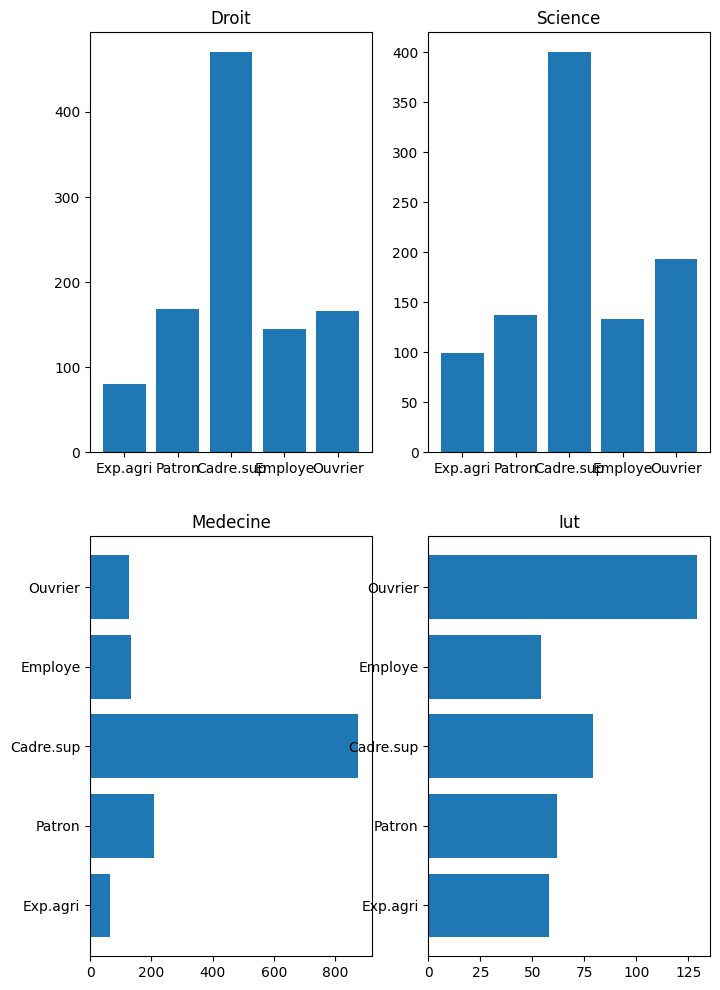

In [8]:
#plt.title('choix des études de Droit')
fig,axs=plt.subplots(2,2,figsize=(8,12))


axs[0,0].bar(data['Unnamed: 0'],data['Droit'])
axs[0,0].set_title('Droit')

axs[0,1].bar(data['Unnamed: 0'],data['Science'])
axs[0,1].set_title('Science')

axs[1,0].barh(data['Unnamed: 0'],data['Medecine'])
axs[1,0].set_title('Medecine')

axs[1,1].barh(data['Unnamed: 0'],data['Iut'])
axs[1,1].set_title('Iut')



Interprèter briévement ce graphique.

Le choix des études en fonction de secteur d'activités des parents semble dépendre de ce dernier: plus les parents sont cadres plus les enfants choisissent des filières de grandes études (Droit,Science,Medecine). On obseve pas tout à fait la même chose pour ceux choisi l'Iut: les enfants des ouvriers ont plus tendance à choisir cette filière.

# Le rôle de l'AFC est de mettre en évidence les différences entre les profils et d'identifier les éventuels liens entre le secteur d'activité des parents et le choix des formations des enfants.

# Analyse des lignes

calculer les profils marginaux.

In [9]:


x_marginal_line_profil=y.sum(axis=1)

x_marginal_colunn_profil=y.sum(axis=0)
x_marginal_colunn_profil

array([0.27193446, 0.25422833, 0.37288584, 0.10095137])

calculer par exmple la distance de KHI-2 entre le cadre (2) et l'ouvrier (4).

In [10]:
def khi_distance(p,q):
    d=0
    for j in range(4):
        fj_sur_p=y[p][j]/x_marginal_line_profil[p]
        fj_sur_q=y[q][j]/x_marginal_line_profil[q]
        a=np.square(fj_sur_p - fj_sur_q)
        d+=a/x_marginal_colunn_profil[j]
    return d
    
    

In [11]:
d_2_4=khi_distance(1,3)
print(d_2_4)

0.02451414731389769


calculer par exemple la distance de KHI-2 entre le cadre (2) et le patron (1).

In [12]:
d_2_1=khi_distance(1,0)
print(d_2_1)


0.16211730879746994


Calculer la distance entre les modalités des lignes.

In [13]:
distances=np.zeros((5,5))
for i in range(5):
    for j in range(5):
        distances[i][j]=khi_distance(i,j)

print(distances)

[[0.         0.16211731 0.45384657 0.08739961 0.00417158]
 [0.16211731 0.         0.08461088 0.02451415 0.19182257]
 [0.45384657 0.08461088 0.         0.17684655 0.51090079]
 [0.08739961 0.02451415 0.17684655 0.         0.11541275]
 [0.00417158 0.19182257 0.51090079 0.11541275 0.        ]]


In [14]:
s_2=0
for i in range(4):
    s_1=0
    for j in range(4):
        n_ij=x[i][j]
        n_i0=x_marginal_line[i]
        n_0j=x_marginal_colunn[j]
        n=total
        prod_profil=(n_i0*n_0j)/n
        carre_diff=np.square(n_ij-prod_profil)/prod_profil
        s_1+=carre_diff
    s_2+=s_1
s_2
print(s_2)

193.88798528581364


Donner sous forme d'une carte thermique une vue d'ensemble de ces distances.

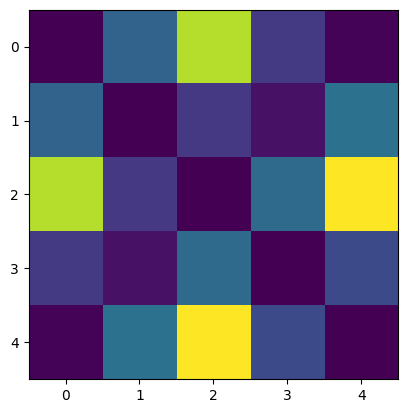

In [15]:
plt.imshow(distances)

Plus le point est clair, plus la distance entre les modalités correspondantes est grande comme c'est le cas entre l'ouvrier et le cadre.sup.

Calculer la distance par rapport à l'origine.

In [16]:
def distance_o(p):
    d=0
    for j in range(4):
        fj_sur_p=y[p][j]/x_marginal_line_profil[p]
        #fj_sur_q=y[q][j]/x_marginal_line_profil[q]
        f0_j=x_marginal_colunn_profil[j]
        a=np.square(fj_sur_p - f0_j)
        d+=a/x_marginal_colunn_profil[j]
    return d

dist_o=[]
for i in range(5):
    dist_o.append(distance_o(i))
print(dist_o)

[0.17034955219813944, 0.0033106247818373417, 0.06930189568809152, 0.03011317268019714, 0.20549249831936717]


Calculer le poids et l'inertie des lignes.

In [17]:
poids=x_marginal_line_profil
inertie_line=poids*dist_o
print(inertie_line)

[0.01359555 0.00050307 0.03342388 0.0037164  0.03339796]


Intépreter les resultas. 

Calculer l'inertie totale.

In [18]:
inertie=inertie_line.sum()
print(inertie)


0.08463685828547157


Effectuer une analyse factorielle des correspondances avec le package fanalysis:

Afficher les valeurs propres.

Afficher la fraction d'inertie retournée par chaque facteur.

Afficher la fraction d'inertie retournée cumulée.

In [21]:

mon_ca=CA(row_labels=data.index.values, col_labels=data.columns.values)
fanalysis_data=mon_ca.fit(x)
fanalysis_data.eig_


array([[8.23936026e-02, 1.70344867e-03, 5.39807038e-04],
       [9.73495522e+01, 2.01265584e+00, 6.37791913e-01],
       [9.73495522e+01, 9.93622081e+01, 1.00000000e+02]])

Interpréter les résultas.

Donner un affichage graphique des valeurs propres.

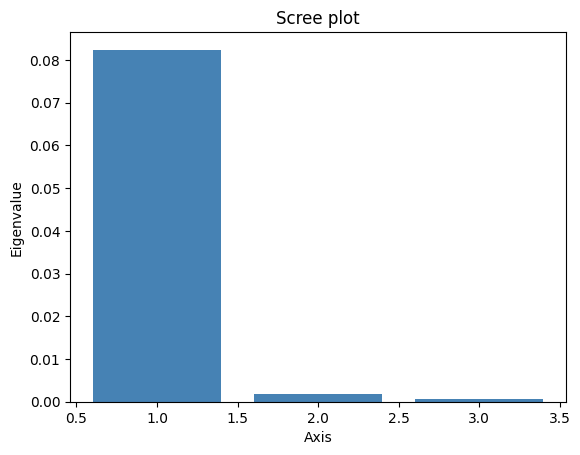

In [22]:
fanalysis_data.plot_eigenvalues()

Présenter les lignes d'individus dans le premier plan factoriel.

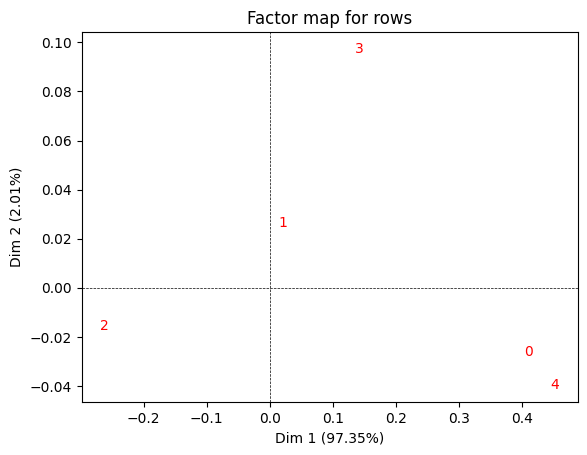

In [24]:
fanalysis_data.mapping_row(num_x_axis=1,num_y_axis=2)

Calculer les distances euclidiennes dans le premier plan factoriel.

In [50]:
fanalysis_data.row_contrib_
fanalysis_data.row_coord_
fplan1_coord=fanalysis_data.row_coord_[:,:1]
fplan1_coord
dist_eucli1=np.zeros((len(fplan1_coord),len(fplan1_coord)))
for i in range(len(fplan1_coord)):
    for j in range(i,len(fplan1_coord)):
        dist_eucli1[i][j]=np.abs(fplan1_coord[i]-fplan1_coord[j])

dist_eucli1        

array([[0.        , 0.38996465, 0.67283248, 0.26802512, 0.0413656 ],
       [0.        , 0.        , 0.28286783, 0.12193953, 0.43133026],
       [0.        , 0.        , 0.        , 0.40480736, 0.71419808],
       [0.        , 0.        , 0.        , 0.        , 0.30939072],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

# Analyse des colonnes

De la même manière que pour les profils en ligne, nous pouvons calculer les distances à l'origine , les poids  et les inerties.

Calculer d'abord le profil "moyen" des secteurs.

In [35]:
profil_colunn=np.zeros((len(x),len(x[0])))
for i in range(len(x)):
    for j in range(len(x[0])):
        profil_colunn[i][j]=x[i][j]/x_marginal_colunn[j]



profil_moyen=profil_colunn.mean(axis=1)
profil_moyen


array([0.09463877, 0.15384845, 0.42504928, 0.12905131, 0.1974122 ])

Donner le tableau des profils par secteur (i.e. profiles colonnes).

In [34]:
profil_colunn

array([[0.07774538, 0.1029106 , 0.04606662, 0.15183246],
       [0.16326531, 0.14241164, 0.14741318, 0.16230366],
       [0.45675413, 0.41580042, 0.62083629, 0.20680628],
       [0.14091351, 0.13825364, 0.09567682, 0.14136126],
       [0.16132167, 0.2006237 , 0.09000709, 0.33769634]])

Calculer la distance à l'origine pour chaque secteur

In [59]:
def distance_o(q):
    d=0
    for j in range(5):
        fj_sur_q=y[j][q]/x_marginal_colunn_profil[q]
        #fj_sur_q=y[q][j]/x_marginal_line_profil[q]
        f0_j=x_marginal_line_profil[j]
        a=np.square(fj_sur_q - f0_j)
        d+=a/x_marginal_line_profil[j]
    return d

dist_o1=[]
for i in range(4):
    dist_o1.append(distance_o(i))
print(dist_o1)

[0.004737762472557096, 0.027167881874598183, 0.09279170313576376, 0.41446627926711277]


Intépréter les résultas 

calculer le poids des colonnes.

In [57]:
poids_culunn=x_marginal_colunn_profil

Calculer les inerties.

In [62]:
inertie_culunn=poids_culunn*dist_o1
inertie_culunn

array([0.00128836, 0.00690685, 0.03460071, 0.04184094])

Ineterpréter les résultas 

Calculer la somme des inerties

In [64]:
inertie1=inertie_culunn.sum()
inertie1

0.08463685828547157

Expliquer ce résultats. 

Calculer les coordonnées des modalités colonnes pour les 3 facteurs de l'AFC sur les données

In [65]:
fanalysis_data.col_coord_

array([[ 0.02798724,  0.06066916, -0.01654478],
       [ 0.1604617 ,  0.00273419,  0.03758258],
       [-0.30312512, -0.02966181, -0.00520025],
       [ 0.64017413, -0.0607488 , -0.03086991]])

Donner une représentation graphique dans le premier plan factoriel

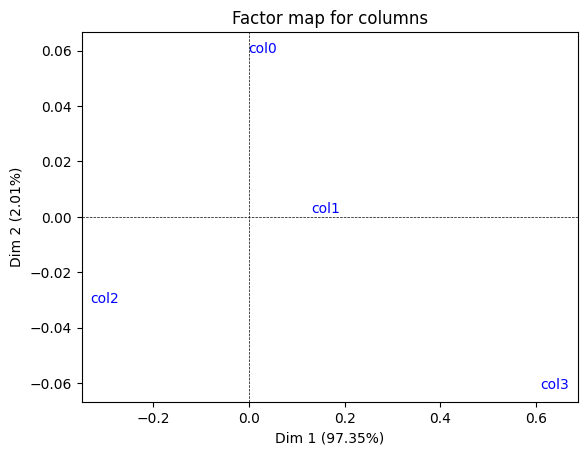

In [25]:
fanalysis_data.mapping_col(num_x_axis=1,num_y_axis=2)

Donner une intérprétation du graphique

L'Iut et la Médecine sont corrélées négativement et que l'Iut contribue plus au premier axe factoriel par rapport aux autres donc une plus importante variance. Droit et Science sont corrélées positivement et sont proches sur le premier axe factoriel et y contribuent peu.

# Analyse lignes-colonnes

Former le tableau des effectifs théoriques :

In [68]:
tab_th=x

Effctuer le test KHI-2 d'indépendance

In [69]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(tab_th)

On rejette l'hypothese nulle ? pourquoi ?

In [72]:
st_chi2
st_dof
st_p

2.582612649831932e-61

on rejette l'hypothèse nulle parce que la p-value est trop faible.

Donner une représentation simultanée et interpréter le résultas

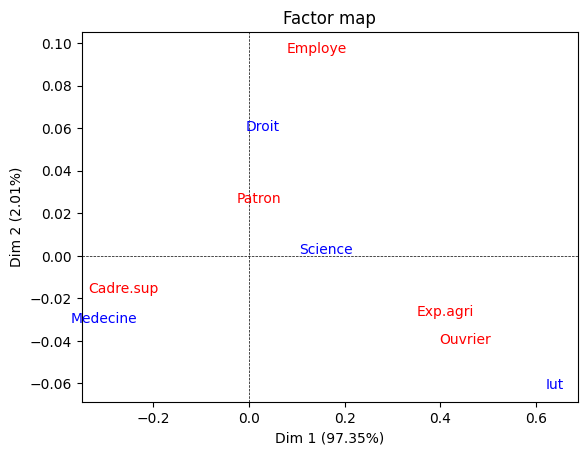

In [73]:
fanalysis_data.mapping(num_x_axis=1,num_y_axis=2)

Les enfants dont les parents sont des ouvriers ou agriculteurs sont ceux qui le plus font l'Iut. Ceux dont les parents sont des cadres.sup ont tendance à faire de la Médecine. Tandisque les enfants dont les parents sont des patrons font des études de Droit ou de science.